In [ ]:
!git clone https://github.com/xinntao/ESRGAN


fatal: destination path 'ESRGAN' already exists and is not an empty directory.


In [10]:
%cd ESRGAN

[Errno 2] No such file or directory: 'ESRGAN'
/content/ESRGAN


In [9]:
!ls

barefeet1.png  LICENSE	      __pycache__  RRDBNet_arch.py
feet-min.png   LR	      QA.md	   solid-green-background.png
figures        models	      README.md    test.py
human.jpg      net_interp.py  results	   transer_RRDB_models.py


In [11]:
from PIL import Image 
import matplotlib.pyplot as plt 
import torch

In [12]:
im1 = Image.open(r'human.jpg')
im1.save(r'human1.png')

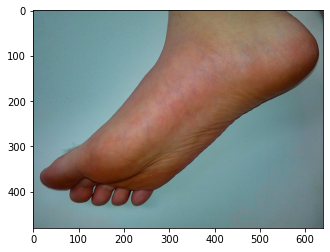

In [13]:
img = Image.open('human1.png') 
plt.imshow(img)
plt.show()

In [ ]:
!python test.py

Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 picfoot_copy
2 comic
3 baboon
4 human1
tcmalloc: large alloc 1258291200 bytes == 0x40a38000 @  0x7f20f7b20b6b 0x7f20f7b40379 0x7f202a6f750e 0x7f202a6e97c2 0x7f206465b10f 0x7f206465ba51 0x7f206465baa4 0x7f206465bbb2 0x7f2065223c28 0x7f2065264232 0x7f2064bc068b 0x7f206522c67d 0x7f206522c714 0x7f206512bb27 0x7f2064bbe3f0 0x7f206531e11c 0x7f20650d8922 0x7f206605d1b9 0x7f206605d66d 0x7f2065126ad6 0x7f20dfc26cb6 0x593784 0x548c51 0x51566f 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x59c019 0x595ef6
tcmalloc: large alloc 1258291200 bytes == 0x8ba38000 @  0x7f20f7b20b6b 0x7f20f7b40379 0x7f202a6f750e 0x7f202a6e97c2 0x7f2064d6fe38 0x7f20647ddf79 0x7f20647de510 0x7f20647e0b1a 0x7f2064d66df4 0x7f2064d61252 0x7f2064d61e27 0x7f206531d112 0x7f2064e4286e 0x7f206489495d 0x7f206531ca3a 0x7f2064e30557 0x7f206488d39b 0x7f206531c7da 0x7f2064e071d6 0x7f2065e44f18 0x7f2065e45a66 0x7f2064e2f1e1 0x7f2064891c49 0x7f20653ad022 0x7f20651b228e 0x7f20dfb895fc 0x

In [ ]:
!ls

barefeet1.png  LR	      results
feet-min.png   models	      RRDBNet_arch.py
figures        net_interp.py  solid-green-background.png
human1.png     __pycache__    test.py
human.jpg      QA.md	      transer_RRDB_models.py
LICENSE        README.md


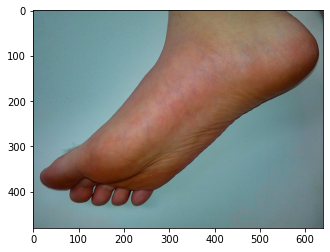

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('LR/human1.png') 
plt.imshow(img)
plt.show()

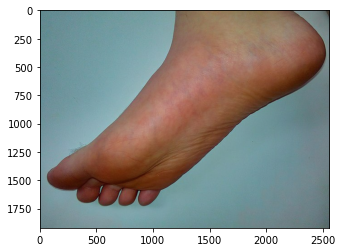

In [ ]:
img = Image.open('results/human1_rlt.png') 
plt.imshow(img)
plt.show()

In [14]:
import numpy as np

In [15]:
from torchvision import models 
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [16]:
import torchvision.transforms as T

In [17]:
trf = T.Compose([#T.Resize(250), T.CenterCrop(250), 
                 T.ToTensor(), T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])]) 
inp = trf(img).unsqueeze(0)

In [18]:
out = fcn(inp)["out"] 
print(out.shape)

torch.Size([1, 21, 480, 640])


In [19]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy() 
print(om.shape)

(480, 640)


In [20]:
import numpy as np

In [21]:
print(np.unique(om))

[ 0 15]


In [22]:
# Define the helper function
def decode_segmap(image, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb

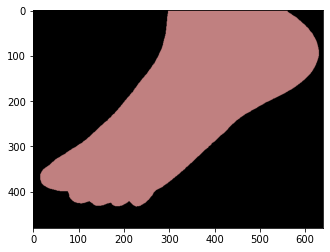

In [23]:
rgb = decode_segmap(om) 
plt.imshow(rgb)
plt.show()

In [ ]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([#T.Resize(256), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb) 
  plt.axis('off'); plt.show()

In [ ]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

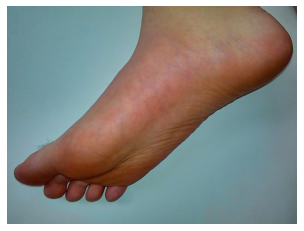

In [ ]:
segment(dlab, 'results/human1_rlt.png')

In [ ]:
import cv2

In [ ]:
def decode_segmap(image, source, nc=21):
  # Load the foreground input image


          label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
          r = np.zeros_like(image).astype(np.uint8)
          g = np.zeros_like(image).astype(np.uint8)
          b = np.zeros_like(image).astype(np.uint8)
          for l in range(0, nc):
            idx = image == l
            r[idx] = label_colors[l, 0]
            g[idx] = label_colors[l, 1]
            b[idx] = label_colors[l, 2]
          rgb = np.stack([r, g, b], axis=2)
          foreground = cv2.imread(source)

          # Change the color of foreground image to RGB
          # and resize image to match shape of R-band in RGB output map
          foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
          foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))

          # Create a background array to hold white pixels
          # with the same size as RGB output map
          background = 255 * np.ones_like(rgb).astype(np.uint8)

          # Convert uint8 to float
          foreground = foreground.astype(float)
          background = background.astype(float)

          # Create a binary mask of the RGB output map using the threshold value 0
          th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

          # Apply a slight blur to the mask to soften edges
          alpha = cv2.GaussianBlur(alpha, (7,7),0)

          # Normalize the alpha mask to keep intensity between 0 and 1
          alpha = alpha.astype(float)/255

          # Multiply the foreground with the alpha matte
          foreground = cv2.multiply(alpha, foreground)

          # Multiply the background with ( 1 - alpha )
          background = cv2.multiply(1.0 - alpha, background)

          # Add the masked foreground and background
          outImage = cv2.add(foreground, background)

          # Return a normalized output image for display
          return outImage/255


In [ ]:
path="human1.png"

In [ ]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([#T.Resize(256), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om, path)
  plt.imshow(rgb) 
  plt.axis('off'); plt.show()

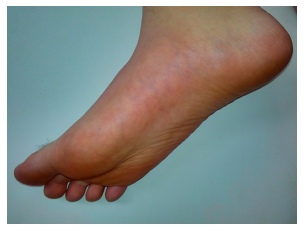

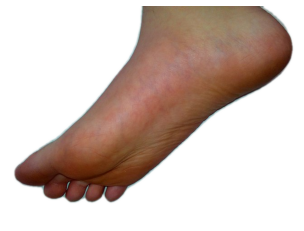

In [ ]:
segment(dlab, path)

In [ ]:
def decode_segmap(image, source, bgimg, nc=21):

            label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
            r = np.zeros_like(image).astype(np.uint8)
            g = np.zeros_like(image).astype(np.uint8)
            b = np.zeros_like(image).astype(np.uint8)
            for l in range(0, nc):
              idx = image == l
              r[idx] = label_colors[l, 0]
              g[idx] = label_colors[l, 1]
              b[idx] = label_colors[l, 2]
            rgb = np.stack([r, g, b], axis=2)
            # Load the foreground input image
            foreground = cv2.imread(source)

            # Load the background input image
            background = cv2.imread(bgimg)

            # Change the color of foreground image to RGB 
            # and resize images to match shape of R-band in RGB output map
            foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
            background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
            foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))
            background = cv2.resize(background,(r.shape[1],r.shape[0]))

            # Convert uint8 to float
            foreground = foreground.astype(float)
            background = background.astype(float)

            # Create a binary mask of the RGB output map using the threshold value 0
            th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

            # Apply a slight blur to the mask to soften edges
            alpha = cv2.GaussianBlur(alpha, (7,7),0)

            # Normalize the alpha mask to keep intensity between 0 and 1
            alpha = alpha.astype(float)/255

            # Multiply the foreground with the alpha matte
            foreground = cv2.multiply(alpha, foreground)

            # Multiply the background with ( 1 - alpha )
            background = cv2.multiply(1.0 - alpha, background)

            # Add the masked foreground and background
            outImage = cv2.add(foreground, background)
            # Return a normalized output image for display
            return outImage/255


In [ ]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([#T.Resize(256), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om, path, "solid-green-background.png")
  plt.imshow(rgb) 
  plt.axis('off'); plt.show()

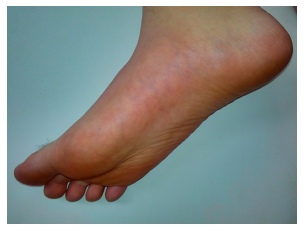

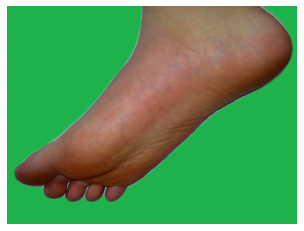

In [ ]:
segment(dlab, path)